# Chapter 06. RNN with gate
RNN is easy and simple. but it has limits: hard to understand long term dependency.  
we use LSTM or GRU later.  
those model has 'gate'. 'gate' allows model to understand long term dependency.  
we will learn 'gate', and LSTM. and how does this model can have long term memory.  

## 6.1 RNN's problem.
: no long term memory.  
because BPTT has gradient vanishing/ explosion problem.  

### 6.1.1 RNN review
RNN has horizontal structure, input xt, output ht.  
ht is 'hidden state', is stores previous information.  

### 6.1.2 gradient vanishing/explosion.
suppose   
"tom was watching TV in his room, Mary came into the room. Maty said hi to [?]"  
we want "tom" in the blank. but backpropagation takes too long way

### 6.1.3 reason for gradient vanishing/ explosion
how does tanh and MatMul changes backpropagation?  
d(tanh) = 1 - y^2  
MatMul's backpropagation is W^t (?)  
how does MatMul affect backprop?

[2.4684068094579303, 3.3357049741610365, 4.783279375373182, 6.279587332087612, 8.080776465019053, 10.251163032292936, 12.936063506609896, 16.276861327786712, 20.45482961834598, 25.688972842084684, 32.25315718048336, 40.48895641683869, 50.8244073070191, 63.79612654485427, 80.07737014308985, 100.5129892205125, 126.16331847536823, 158.35920648258823, 198.7710796761195, 249.495615421267]


c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anacond

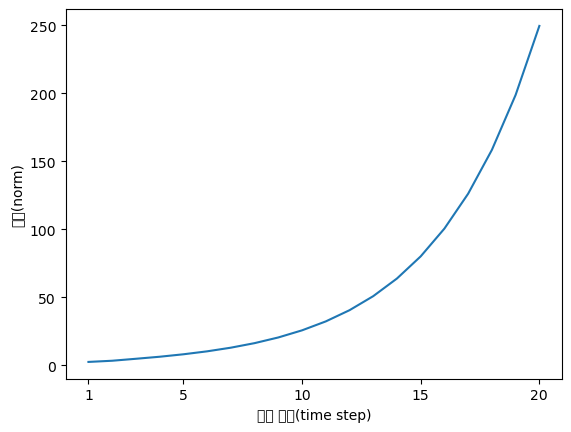

In [1]:
import rnn_gradient_graph

this is exploding gradient.

[1.2342034047289652, 0.8339262435402591, 0.5979099219216477, 0.39247420825547574, 0.2525242645318454, 0.16017442237957713, 0.10106299614538981, 0.06358148956166684, 0.03995083909833199, 0.025086887541098325, 0.015748611904532892, 0.009884999125204758, 0.006204151282595105, 0.003893806551809953, 0.002443767399386287, 0.0015337065005571365, 0.0009625497320203265, 0.0006040924319556741, 0.00037912574706291106, 0.00023793756048323344]


c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GAILAB\anacond

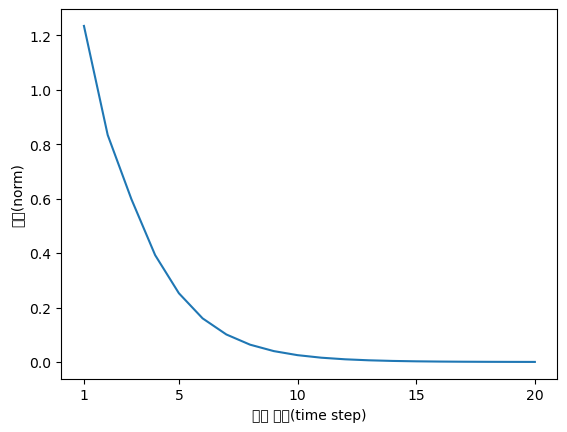

<module 'rnn_gradient_graph' from 'd:\\VScode_Local\\DeepLearningFromScratch2-main\\DeepLearningFromScratch_2\\ch06\\rnn_gradient_graph.py'>

In [9]:
import importlib

importlib.reload(rnn_gradient_graph)

this is vanishing gradient.

why does this happen? because we multiplied Wh T times.  
if Wh is scalar, whether Wh is bigger or smaller than 1 is important.  
what if Wh is matrix? in this case, eigenvalue is important.  
martix' eigenvalue indicates how sparse is the matrix' element.  
checking eigenvalue and see if it is bigger and smaller than 1. then you can predict gradients.

### 6.1.4 solution to exploding gradient 
: gradients clipping.  
g : gradient  
if g > threshold:  
g = ( threshold/|g| ) * g

In [12]:
# ch06/clip_grads.py
# common/util.py
import numpy as np

dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate


print('before:', dW1.flatten())
clip_grads(grads, max_norm)
print('after:', dW1.flatten())


before: [2.77977507 4.54622076 2.05410345 2.01378711 5.1403506  0.87229369
 4.83585532 3.62176212 7.07686622]
after: [0.66651711 1.09006443 0.4925201  0.4828533  1.23252117 0.20915313
 1.15951119 0.86840351 1.69684679]


## 6.2 vanishing gradient and LSTM
in order to fix vanishing gradient, we need to fix foundation of RNN architecture.  
now we use core concept of this chapter, 'gate'.  

### 6.2.1 LSTM's interface
we will simplify our diagram little bit.  
RNN takes ht-1, xt, and gives ht.  
LSTM takes ct-1, ht-1, and xt, and gives ct, ht.  
i wonder what is c?
  
c is "memory cell"  
unlike x and h, c is contained in LSTM layer only.  
from other layer, c is hidden and nonointeractable.  

### 6.2.2 crafting LSTM layer
https://colah.github.io/posts/2015-08-Understanding-LSTMs/
ct has all the memory from past.  
we improve ht by using ct. ht = tanh(ct)  
  
why the name is 'gate'?  
imagine floodgate. floodgate controls flow of water.  
LSTM's gate controls flow of data, it is more than open/closed. it can control its 'openness' (ex: 20% open)  
interesting thing is: gate also learns how much it should be opened.

### 6.2.3 output gate
